<a href="https://colab.research.google.com/github/sgr1118/GD-NLP-Theory/blob/main/GD5_Word_Embedding(220101).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5-1. 벡터화

1. BOG / DTM

(1) BOG

[bog 영상](https://youtu.be/dKYFfUtij_U)

Q1. Out of Vocabulary 문제란 어떤 문제를 말하나요?
- 단어장(사전)에 없는 단어에 대처할 수 없어 난감한 문제

(2) DTM

![](https://d3s0tskafalll9.cloudfront.net/media/images/GN-3-L-1.max-800x600.jpg)
<center>DTM</center>

DTM의 행을 문서 벡터, 열을 단어 벡터라고 볼 수 있습니다. 이때, DTM의 문서 벡터나 단어 벡터는 대부분의 값이 0이라는 특징을 가지고 있는데, 이런 벡터를 희소 벡터(sparse vector) 라고 합니다.

2. TF-IDF

[TF-IDF 영상](https://youtu.be/meEchvkdB1U)

3. 원-핫 인코딩
- 모든 단어의 관계를 독립적으로 정의한다. 단어장에 있는 모든 단어에 대해서 1 ~ N까지 고유한 정수를 부여한다. 이 정수는 단어장에 있는 각 단어의 일종의 인덱스 역할을 합니다. 각 단어는 V차원의 벡터로 표현되는데, 해당 단어의 인덱스 위치만 1이고 나머지는 전부 0의 값을 가지는 벡터가 됩니다.

- 문서 1 : 강아지, 고양이, 강아지
- 문서 2 : 애교, 고양이
- 문서 3 : 컴퓨터, 노트북

이 문서로 단어장을 만들면 크기는 5가 된다. 강아지 1번, 고양이 2번, 컴퓨터 3번, 애교 4번, 노트북 5번

숫자 부여에 정해진 규칙은 없지만 관례적으로는 빈도수가 높은 단어들부터 낮은 숫자를 부여해요. 가장 많이 등장하는 단어는 1부터 부여하는 식이죠. 이렇게 하면 아주 큰 정수가 부여된 단어는 빈도수가 아주 낮은 단어라는 뜻이고, 그 단어는 중요하지 않은 단어일 확률이 높습니다. 그러므로 추가적인 전처리로 정수가 아주 큰 숫자는 그냥 단어장에서 제거해버리는 선택을 할 수도 있습니다.

- 강아지 : [1, 0, 0, 0, 0]
- 고양이 : [0, 1, 0, 0, 0]
- 애교 : [0, 0, 1, 0, 0]
- 컴퓨터 : [0, 0, 0, 1, 0]
- 노트북 : [0, 0, 0, 0, 1]

# 5-2. 벡터화 실습: 원-핫 인코딩 구현해보기

한국어 형태소 konlpy 설치하기

In [ ]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

In [ ]:
import re
from konlpy.tag import Okt
from collections import Counter

In [ ]:
# 전처리되지 않은 문장
text = "임금님 귀는 당나귀 귀! 임금님 귀는 당나귀 귀! 실컷~ 소리치고 나니 속이 확 뚫려 살 것 같았어."
text

'임금님 귀는 당나귀 귀! 임금님 귀는 당나귀 귀! 실컷~ 소리치고 나니 속이 확 뚫려 살 것 같았어.'

Step 2. 전처리 이야기

이 텍스트에는' !, ~, . '와 같은 각종 특수문자들이 있습니다. 상황에 따라 다르겠지만, 대개 이런 특수문자들은 자연어 처리에서 큰 의미를 가지지 못합니다. 여기서는 정규 표현식을 사용하여 특수문자들을 제거하고자 합니다.

한글과 공백을 제외하고 특수문자만 제거하고 싶다면 어떤 정규 표현식을 사용하면 될까요? 이를 수행하기 위해서는 정규 표현식으로 한국어의 범위를 지정할 수 있어야 합니다. 일반적으로 자음의 범위는 'ㄱ ~ ㅎ', 모음의 범위는 'ㅏ ~ ㅣ'와 같이 지정할 수 있습니다. 해당 범위 내에 어떤 자음과 모음이 속하는지 알고 싶다면 아래의 링크를 참고

[Hangul Compatibility Jamo](https://www.unicode.org/charts/PDF/U3130.pdf)

또한 완성형 한글의 범위는 '가 ~ 힣'과 같이 사용합니다. 해당 범위 내에 포함된 음절들은 아래의 링크에서 확인할 수 있습니다.

[Hangul Syllables](https://www.unicode.org/charts/PDF/UAC00.pdf)

한글, 공백을 제외한 모든 문자를 표현하는 regex : [^ㄱ-ㅎㅏ-ㅣ가-힣 ]

In [ ]:
# 정규표현식을 사용한 전처리

reg = re.compile('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]') # 가-힣 뒤에 띄어쓰기 포함되있으니 주의!
text = reg.sub('', text)
print(text)

임금님 귀는 당나귀 귀 임금님 귀는 당나귀 귀 실컷 소리치고 나니 속이 확 뚫려 살 것 같았어


Step 3. 토큰화 이야기

단어장을 구성하기 위해서는 단어장의 원소인 토큰(token)이라는 단위를 정해줄 필요가 있습니다. 그리고 한국어는 주로 형태소 분석기를 통해서 토큰 단위를 나눠줍니다. 여기서는 KoNLPy에 내장된 Okt 형태소 분석기를 사용해보겠습니다.

[KoNLPy Okt](https://konlpy.org/en/latest/api/konlpy.tag/#okt-class)


In [ ]:
okt=Okt()
tokens = okt.morphs(text)
print(tokens)

['임금님', '귀', '는', '당나귀', '귀', '임금님', '귀', '는', '당나귀', '귀', '실컷', '소리', '치고', '나니', '속이', '확', '뚫려', '살', '것', '같았어']


Step 4. 단어장 만들기

이제 이 토큰들을 가지고 단어장을 만들어 볼 텐데요. 여기서는 빈도수가 높은 단어일수록 낮은 정수를 부여하려고 합니다. 빈도수가 높은 순서대로 낮은 정수를 부여하기 위해서 각 단어의 빈도수를 카운트 할 필요가 있겠죠? 여기서는 파이썬의 Counter 서브클래스를 사용해서 단어의 빈도를 카운트해 보겠습니다

[파이썬 collections.Counter](https://docs.python.org/3/library/collections.html#collections.Counter)

In [ ]:
vocab = Counter(tokens)
print(vocab)

Counter({'귀': 4, '임금님': 2, '는': 2, '당나귀': 2, '실컷': 1, '소리': 1, '치고': 1, '나니': 1, '속이': 1, '확': 1, '뚫려': 1, '살': 1, '것': 1, '같았어': 1})


단어가 키(key)로, 단어에 대한 빈도수가 값(value)으로 저장되어 있네요. vocab에 단어를 입력하면 빈도수를 리턴합니다. '임금님'이 몇 번 등장했는지 빈도수를 출력해 볼까요?

In [ ]:
vocab['임금님']

2

'임금님'이란 단어가 총 2번 등장했네요. most_common()는 상위 빈도수를 가진 단어를 주어진 수만큼 리턴합니다. 이를 사용하여 등장 빈도수가 높은 단어들을 원하는 개수만큼 얻을 수 있습니다. 등장 빈도 수 상위 5개의 단어만 단어장으로 저장해 볼게요.



In [ ]:
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
print(vocab)

[('귀', 4), ('임금님', 2), ('는', 2), ('당나귀', 2), ('실컷', 1)]


빈도수 상위 5개의 단어만 남아 있는 것을 확인할 수 있습니다! 이제 높은 빈도수를 가진 단어일수록 낮은 정수 인덱스를 부여해 볼까요?

In [ ]:
word2idx = {word[0] : index + 1 for index, word in enumerate(vocab)}
print(word2idx)

{'귀': 1, '임금님': 2, '는': 3, '당나귀': 4, '실컷': 5}


# Step 5: 원-핫 벡터 만들기

이제 원-핫 인코딩을 하는 함수를 만들어 각 단어를 원-핫 벡터로 만들어볼게요. 아래의 함수는 특정 단어와 단어장을 입력하면 해당 단어의 원-핫 벡터를 리턴하는 함수에요.

In [ ]:
def one_hot_encoding(word, word2index):
  one_hot_vector = [0] * (len(word2index))
  index = word2index[word]
  one_hot_vector[index - 1] = 1
  return one_hot_vector

In [ ]:
one_hot_encoding('임금님', word2idx)

[0, 1, 0, 0, 0]

케라스를 통한 원-핫 인코딩(one-hot encoding)

원-핫 인코딩을 지원하는 패키지는 여러 가지가 있는데 여기서는 텐서플로의 케라스 API를 사용해볼 거에요. 우선 필요한 도구들을 임포트 해 보죠. 여기서는 단어장을 만드는 역할을 해주는 케라스 Tokenizer와 원-핫 인코딩을 위한 도구인 to_categorical을 사용합니다.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [ ]:
text = [['강아지', '고양이', '강아지'],['애교', '고양이'], ['컴퓨터', '노트북']]
text

[['강아지', '고양이', '강아지'], ['애교', '고양이'], ['컴퓨터', '노트북']]

In [ ]:
t = Tokenizer()
t.fit_on_texts(text)
print(t.word_index) # 각 단어에 대한 인코딩 결과 출력.

{'강아지': 1, '고양이': 2, '애교': 3, '컴퓨터': 4, '노트북': 5}


In [ ]:
# 단어장 크기 저장
# vocab_size에 +1을 해주는 이유는 케라스 토크나이저는 각 단어에 고유한 정수를 부여할 때
# 숫자 1부터 부여하지만 실제로 자연어 처리를 할 때는 특별 토큰으로 0번 단어로 단어장에 추가로 사용하는 경우가 많기 때문입니다.
# 주로 0번은 패딩(padding) 작업을 위한 패딩 토큰으로 사용되는데, 여기서는 0번 단어도 고려해주는 것이 좋다는 정도로만 이해하고 1을 더해서 단어장의 크기를 저장하겠습니다. 이제 vocab_size는 6이 되었습니다.

vocab_size = len(t.word_index) + 1


케라스 토크나이저에 단어장이 저장되었으므로, 단어장에 속한 단어들로 구성된 텍스트 시퀀스는 케라스 토크나이저를 통해 정수 시퀀스로 변환할 수 있습니다.

In [ ]:
sub_text = ['강아지', '고양이', '강아지', '컴퓨터']
encoded = t.texts_to_sequences([sub_text])
print(encoded)

[[1, 2, 1, 4]]


위의 결과는 텍스트 시퀀스가 정수 시퀀스로 변환되는 것을 보여줍니다. 앞에서 강아지는 1번, 고양이는 2번, 컴퓨터는 4번으로 정수가 부여되었습니다. 이렇게 변환된 정수 시퀀스는 to_categorical()을 사용해 원-핫 벡터의 시퀀스로 변환할 수 있습니다.

In [ ]:
one_hot = to_categorical(encoded, num_classes= vocab_size)
print(one_hot)

[[[0. 1. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0.]]]


# 5-3. 워드 임베딩

1. 희소 벡터(Sparse Vector)의 문제점

DTM, TF-IDF, 원-핫 벡터는 단어장의 크기에 영향을 받는 희소 벡터(sparse vector) 라는 특징을 가지고 있습니다. 원-핫 인코딩의 경우 단어장의 크기가 30,000이라면, 30,000개의 모든 단어 벡터는 각각 30,000 차원의 벡터가 되죠. 그런데 이 벡터들은 하나의 원소만 1이고 29,999개의 원소가 0의 값을 가집니다. 

희소 벡터에는 차원의 저주(curse of dimensionality) 라는 문제가 있습니다. 차원의 저주를 이해하기 위해서 직관적인 이야기로 시작해 볼게요. 같은 정보를 저차원과 고차원에 각각 표현한다고 해 보죠. 저차원에서는 정보의 밀도가 상대적으로 커지지만, 고차원에서는 정보가 흩어지며 밀도가 작아질 거예요. 아래의 그림은 이를 시각화하여 보여주고 있습니다.

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/seukeurinsyas_2021-09-09_15-30-49.png)
<center>차원의 저주</center>

정보 밀도가 작아지는 것, 즉 차원이 커지는 것과 머신 러닝 모델의 성능에는 어떤 연관 관계가 있습니다. 차원의 저주에 대해서는 아래 참고자료를 통해 개념을 정리해 봅시다.

[차원의 저주 보충 설명](http://thesciencelife.com/archives/1001)

Q2. 데이터의 차원이 커지면 더 많은 정보를 담을 수 있게 되므로 무조건 ML 모델의 성능이 올라간다! (O/X)
- X, 차원이 커질수록 훨씬 더 많은 데이터를 가지고도 높은 성능에 이르지 못한다는 점입니다.

원-핫 벡터가 가지는 문제점은 또 있습니다. 사람은 직관적으로 '강아지'와 '고양이'라는 두 단어의 의미적 유사성이 '강아지'와 '컴퓨터'라는 두 단어의 의미적 유사성보다는 높다고 판단할 수 있습니다. '강아지'와 '고양이'는 귀여운 애완동물이고, '컴퓨터'는 데이터를 처리하는 전자기기로 분류할 수 있기 때문입니다. 하지만 원-핫 벡터는 이를 반영하지 못합니다.

벡터 간 유사도를 구하는 방법으로는 대표적으로 내적(inner product)이 있습니다. 임의의 두개의 원-핫 벡터 간 내적(inner product)을 구해보면, 대부분 서로 직교(orthogonal)하여 그 값은 0입니다. 이는 거의 모든 원-핫 벡터의 상호 유사도가 0임을 의미하며. 결국 원-핫 벡터를 통해서는 단어 벡터 간 유사도를 구할 수 없음을 의미합니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/gn-3-l-3-1.max-800x600.jpg)
<center>벡터 직교</center>

기계가 단어 벡터 간 유사도를 구할 수 없다는 점은 오랫동안 자연어 처리의 걸림돌이었습니다. 어떤 사람이 '톺아보다'라는 생소한 단어를 배웠고, '톺아보다'가 '샅샅이 살펴보다'와 유사한 의미임을 학습했다고 해보죠. 그 사람은 이제 '발표 자료를 살펴보다'라는 문장을 '발표 자료를 톺아보다'라는 문장으로 어려움 없이 수정할 수 있습니다. 비록 '발표 자료를 톺아보다'라는 예문을 어디서 읽은 적이 없더라도, 의미적 유사성에 대한 이해를 통해 새로운 자연어를 생성한 셈입니다. 하지만 단어 벡터 간 유사도를 구할 수 없는 기계는 이와 같이 관측하지 못한 문장에 대해서 유연하게 대처할 수 없었습니다.

이에 대한 대안으로 '기계가 단어장 크기보다 적은 차원의 밀집 벡터(dense vector)를 학습'하는 워드 임베딩(word embedding) 이 제안되었습니다. 이를 통해 얻는 밀집 벡터는 각 차원이 0과 1이 아닌 다양한 실숫값을 가지며, 이 밀집 벡터를 임베딩 벡터(embedding vector) 라고 합니다.












2. 워드 임베딩(Word Embedding)

워드 임베딩에서도 한 단어를 벡터로 바꿉니다. 그런데 그 벡터의 길이를 일정하게 정해줍니다. 더 많은 단어가 있다고 해서 벡터의 길이가 길어지지 않습니다. 여기서 일반적으로 벡터의 길이가 단어장 크기보다 매우 작기 때문에 각 벡터 값에 정보가 축약되어야 하고 결국 밀집 벡터(dense vector)가 됩니다.

밀집 벡터는 희소 벡터가 가진 특성을 반대로 표현하고 싶어서 만들어진 말인데요. 대부분 값이 0인 희소 벡터와는 반대로 밀집 벡터에서는 대부분 값이 0이 아닙니다. 또 희소 벡터에서는 각 벡터 값의 의미가 True/False나 갯수처럼 단순했다면 밀집 벡터에서는 각 벡터 값의 의미가 파악하기 어려울 정도로 많은 의미를 함축하고 있죠.

![](https://d3s0tskafalll9.cloudfront.net/media/images/gn-3-l-3-2.max-800x600.jpg)
<center></center>

또 워드 임베딩에서는 단어가 갖는 특성을 계산할 수 있는 방법이 제안됩니다. 단어 사이의 관계나 문장에서 단어가 갖는 특징을 수식으로 나타내고 계산해서 정확한 숫자로 나타내도록 하는 거죠. 이 값이 클수록(또는 작을 수록) 적합한 표현이라고 객관적으로 판단할 수 있게 말이에요. 여기서 사용되는 방법이나 수식은 꽤 다양합니다. 저마다 더 훌륭한 방법을 생각해 내는 것이죠.

앞서 말한 내적을 활용하는 방법을 예로 들어도 좋습니다. 비슷한 의미를 가진 두 단어의 내적이 클수록 잘 변환된 벡터라고 판단하는 거죠. 그러면 비슷한 단어의 내적은 커지고 반대되는 단어의 내적은 작아지도록 만드는 식을 통해 벡터를 계산해 낼 수 있습니다. 이렇게 알아보기 쉬운 단순한 방법을 쓰면 좋겠지만 안타깝게도 실제로 벡터 변환에 이용되는 방법들은 주로 통계학에 기반을 둔 복잡한 식을 활용합니다.

또, 시간이 흘러 이제는 인공 신경망을 이용한 방법이 많이 사용되는데요. 인공 신경망을 학습해가는 과정을 이용해 벡터의 값을 조정해 가는 방법입니다. 우선 무작정 단어의 적합성이나 유사도를 계산해 보고 그 값이 커져야 하는지 작아져야 하는지 따져봅니다. 그런 후 단어 벡터의 값을 조금씩 바꿔 갑니다. 마치 딥러닝에서 손실 값을 이용해 가중치를 바꿔 가듯이 단어 벡터의 값을 조금씩 바꿔 가는 거죠. 이렇게 반복해 학습이 끝나면 단어가 들어가야 할 위치나 의미에 맞게 단어 벡터의 값이 결정됩니다.

예를 들면 아래처럼 단어 벡터가 결정이 될 수 있겠죠.

//      [둥근,빨간,단맛,신맛]
사과  : [0.8, 0.7, 0.7, 0.1] // 0.8만큼 둥글고, 0.7만큼 빨갛고, 0.7만큼 달고, 0.1만큼 신 것은 사과다

바나나: [0.1, 0.0, 0.8. 0.0] // 0.1만큼 둥글고, 0.0만큼 빨갛고, 0.8만큼 달고, 0.0만큼 신 것은 바나나다

귤    : [0.7, 0.5, 0.6, 0.5] // 0.7만큼 둥글고, 0.5만큼 빨갛고, 0.6만큼 달고, 0.5만큼 신 것은 귤이다

이건 예시일 뿐이니 이렇다고 생각하면 절대 안됩니다. 임베딩 방법마다 벡터 값이 결정되는 방법도 다르고 각 벡터 값의 의미도 파악하기란 불가능합니다.

결론적으로 워드 임베딩에서 중요한 것은 두 가지 입니다.

- 한 단어를 길이가 비교적 짧은 밀집 벡터로 나타낸다.
- 그런데 이 밀집 벡터는 단어가 갖는 의미나 단어 간의 관계 등을 어떤 식으로든 내포하고 있다.

이렇게 만들어진 밀집 벡터를 임베딩 벡터라고 말하는데요. 지금까지 이야기를 보면 임베딩 벡터라는 결과물에 대해서만 이야기했습니다. 이제 어떻게 임베딩 벡터를 만들지 살펴볼 차례인데요. 워드 임베딩 방법에는 여러가지가 있기 때문에 지금까지 설명하지 않았던 것 뿐이에요.

앞으로 워드 임베딩을 수행하는 여러 알고리즘을 살펴보게 될 것입니다.


Q3. 임베딩 벡터의 값은 어떤 방식을 통해서 얻어지나요? (힌트 : 원-핫 벡터의 값은 각 단어에 정수를 맵핑해주고, 이로부터 인코딩한다는 점에 표현 방식이 '수동'이라고 볼 수 있습니다.)
- 훈련 데이터로부터 어떤 모델을 학습하는 과정에서 '자동'으로 얻어지는데, 주로 언어 모델(Language Model)을 학습하는 가운데 얻어짐.

[A Neural Probabilistic Language Model](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)

워드 임베딩은 2003년 요슈아 벤지오(Yoshua Bengio) 교수가 NPLM(Neural Probabilistic Language Model) 이란 모델을 통해 제안했습니다. 하지만 당시 이 모델은 학습 속도가 지나치게 느리다는 단점이 있었고, 2013년 구글은 NPLM을 개선하여 정밀도와 속도를 향상시킨 Word2Vec 을 제안했죠. Word2Vec 이후로 FastText 나 GloVe 등과 같은 임베딩 방법이 추가로 제안되었답니다. 여기서는 방금 언급한 이 세 가지 방법에 대해서 배워보겠습니다. 우선 Word2Vec에 대해서 알아볼까요?

# 5-4. Word2Vec (1) 분포 가설

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/word2vec.png)
<center>Korean Word2Vec</center>

[Korean Word2Vec](https://word2vec.kr/search/)

[Word2Vec 영상](https://youtu.be/sY4YyacSsLc)




1. 분포 가설(Distributional Hypothesis)

Word2Vec은 앞서 말했듯이 단어를 벡터로 표현하는 방법의 일종으로 저차원으로 이루어져 있고, 단어의 의미를 여러 차원에 분산하여 표현한 벡터입니다.

Word2Vec의 핵심 아이디어는 분포 가설(distributional hypothesis) 을 따릅니다. 이 가설은 언어학자 존 루퍼트 퍼스(John Rupert Firth)의 다음 인용으로 설명됩니다.

You shall know a word by the company it keeps(곁에 오는 단어들을 보면 그 단어를 알 수 있다).

이 인용의 뜻은 어떤 단어들의 의미를 보려면 주변 단어들을 보라는 의미를 내포하고있다. 

- 분포 가설 : 비슷한 문맥에서 같이 등장하는 경향이 있는 단어들은 비슷한 의미를 가진다.

분포 가설에 따르는 Word2Vec은 같이 등장하는 경향이 적은 단어들에 비해 '강아지', '애교, '귀여운'과 같은 단어들을 상대적으로 유사도가 높은 벡터로 만듭니다.



# 5-5. Word2Vec (2) CBoW

Word2Vec에는 크게 CBoW와 Skip-gram라는 두 가지 방법이 있습니다. CBoW는 주변에 있는 단어들을 통해 중간에 있는 단어들을 예측하는 방법입니다. 반대로, Skip-Gram은 중간에 있는 단어로 주변 단어들을 예측하는 방법입니다.


1. CBoW(Continuous Bag of words)

- 예문 : "I like natural language processing."

이런 예문이 있다고 할 때, Cbow는 중간에 있는 단어를 예측하는 방법이므로 {"i", "like", "language", "processing"}으로부터 'natural'을 예측하는 것이 CBoW가 하는 일이다.

이때 예측해야하는 단어를 중심 단어라고 하고, 예측에 사용되는 단어들을 주변 단어하고 한다.

중심 단어를 예측하기 위해 앞, 뒤로 몇 개의 단어를 볼지를 결정를 결정했다면, 그 범위를 윈도우(window) 라고 합니다.

만약 윈도우 크기가 1이고, 예측하고자 하는 중심 단어가 'language'라면 앞의 한 단어인 'natural'과 뒤의 한 단어인 'processing'을 참고합니다. 윈도우 크기가 m일 때, 중심 단어를 예측하기 위해 참고하는 주변 단어의 개수는 2m이다.

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_23.png)
<center>슬라이딩 윈도우</center>

윈도우 크기를 정했다면, 윈도우를 계속 움직여서 주변 단어와 중심 단어를 바꿔가며 학습을 위한 데이터 셋을 만들 수 있는데, 이 방법을 슬라이딩 윈도우(sliding window) 라고 합니다. 위의 그림은 윈도우 크기가 1일 때, 하나의 샘플 문장에 대해 데이터셋을 만드는 과정을 보여줍니다. 위 그림에서 슬라이딩 윈도우를 처음부터 끝까지 마친다면 다음과 같은 데이터셋을 얻을 수 있습니다.


- 아래 데이터셋의 형식은 ((주변 단어의 셋), 중심 단어)임을 가정한다.
- ((like), I), ((I, natural), like), ((like, language), natural), ((natural, processing), language), ((language), processing)

이렇게 선택된 데이터셋에서 단어 각각은 원-핫 인코딩되어 원-핫 벡터가 되고, 원-핫 벡터가 CBoW나 Skip-gram의 입력이 됩니다. CBoW를 시각화하면 아래처럼 됩니다. 

![](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_24.max-800x600.png)
<center>CBoW</center>

위의 그림은 원-핫 벡터로 변환된 다수의 주변 단어를 이용해 원-핫 벡터로 변환된 중심 단어를 예측할 때의 CBoW의 동작 메커니즘을 보여주고 있습니다. 윈도우 크기가 m이라면 2m개의 주변 단어를 이용해 1개의 중심 단어를 예측하는 과정에서 두 개의 가중치 행렬(matrix)을 학습하는 것이 목적이죠.

그림에서 주황색 사각형이 첫 번째 가중치 행렬 WW, 초록색 사각형이 두 번째 가중치 행렬 W'W 
′
 입니다. 두 개의 가중치 행렬이 있다는 것을 인공 신경망 구조에서 보면 CBoW는 입력층, 은닉층, 출력층 이렇게 3개의 층으로만 구성된 인공 신경망이라는 의미입니다. 사실 Word2Vec은 은닉층이 1개라서 딥 러닝이라기보다는 얕은 신경망(Shallow Neural Network) 을 학습한다고 볼 수 있습니다.

CBoW 신경망 구조에서 주변 단어 각각의 원-핫 벡터는 입력층에 위치하고 중심 단어의 원-핫 벡터가 위치한 곳은 출력층이라고 볼 수 있습니다. CBoW에서 사실 입력층과 출력층의 크기는 단어 집합의 크기인 VV로 이미 고정되어 있습니다. (원-핫 벡터로 표현되었기 때문이겠죠?) 하지만 은닉층의 크기는 사용자가 정의해주는 하이퍼파라미터인데요. 여기서는 은닉층의 크기를 NN이라고 해보겠습니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_25.max-800x600.png)
<center>입력층에서 은닉층으로 가는 과정</center>

주변 단어로 선택된 각각의 원-핫 벡터는 첫 번째 가중치 행렬과 곱해지게 됩니다. 이때 가중치 행렬의 크기는 (V × N)입니다. 그런데 원-핫 벡터는 각 단어의 정수 인덱스 i에 해당되는 위치에만 1의 값을 가지므로, 원-핫 벡터와 가중치 행렬과의 곱은 가중치 행렬의 i 위치에 있는 행을 그대로 가져오는 것과 동일 합니다.

이를 마치 테이블에서 값을 그대로 룩업(lookup)해오는 것과 같다고 하여 룩업 테이블(lookup table) 이라고 합니다. 위의 그림은 가중치 행렬의 크기가 (5 × 4)일 때의 룩업 테이블을 보여줍니다. 위의 그림에서는 단어장의 크기가 5, 은닉층의 크기가 4일 때를 가정하고 있습니다.

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/cbow.png)
<center>은닉층 연산</center>

룩업 테이블을 거쳐서 생긴 2m개의 주변 단어 벡터들은 각각 N의 크기를 가집니다. CBoW에서는 이 벡터들을 모두 합하거나, 평균을 구한 값 을 최종 은닉층의 결과로 합니다. 그러면 최종 은닉층의 결과도 N차원의 벡터가 되겠죠. 이게 은닉층 연산의 전부입니다. Word2Vec에서는 은닉층에서 활성화 함수나 편향(bias)을 더하는 연산을 하지 않습니다.

Word2Vec에서의 은닉층은 활성화 함수가 존재하지 않고, 단순히 가중치 행렬과의 곱셈만을 수행하기에 기존 신경망의 은닉층과 구분 지어 투사층(projection layer) 이라고도 합니다.

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_26.png)
<center>출력층 연산</center>

은닉층에서 생성된 N차원의 벡터는 두 번째 가중치 행렬과 곱해집니다. 이 가중치 행렬의 크기는 (N × V)이므로, 곱셈의 결과로 나오는 벡터의 차원은 VV입니다. 출력층은 활성화 함수로 소프트맥스 함수를 사용하므로 이 VV차원의 벡터는 활성화 함수를 거쳐 모든 차원의 총합이 1이 되는 벡터로 변경됩니다.

CBoW는 이 출력층의 벡터를 중심 단어의 원-핫 벡터와의 손실(loss)을 최소화 하도록 학습시킵니다. 이 과정에서 첫 번째 가중치 행렬 WW와 두 번째 가중치 행렬 W'가 업데이트되는데, 학습이 다 되었다면 N차원의 크기를 갖는 W의 행이나 W'의 열로부터 어떤 것을 임베딩 벡터로 사용할지를 결정하면 됩니다. 때로는 W와 W'의 평균치를 임베딩 벡터로 선택하기도 합니다.




# 5-6. Word2Vec (3) Skip-gram과 Negative Sampling

1. Skip-gram

Skip-gram은 중심 단어로부터 주변 단어를 예측한다는 것이 다른 점이다.

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_27.png)
<center>슬라이딩 윈도우</center>

앞서 봤던 CBoW에서 얻은 샘플 수는 5였다. 그런데 Skip-gram은 데이터셋 구성부터 다릅니다. 중심 단어로부터 주변 단어 각각을 예측하기 때문입니다. 위 그림으로부터 얻을 수 있는 Skip-gram의 데이터셋은 아래와 같다.

- 아래 데이터셋의 형식은 (중심 단어, 주변 단어)임을 가정합니다.
- (i, like) (like, I), (like, natural), (natural, like), (natural, language), (language, natural), (language, processing), (processing, language)

![](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_28.max-800x600.png)
<center>Skip-gram 과정</center>

중심 단어로부터 주변 단어를 예측한다는 점, 그리고 이로 인해 중간에 은닉층에서 다수의 벡터의 덧셈과 평균을 구하는 과정이 없어졌다 는 점만 제외하면 CBoW와 메커니즘 자체는 동일합니다. skip-gram도 CBoW와 마찬가지로 학습 후에 가중치 행렬 WW의 행 또는 W'의 열로부터 임베딩 벡터를 얻을 수 있습니다.





2. 네거티브 샘플링(negative sampling)

대체적으로 Word2Vec를 사용할 때는 SGNS(Skip-Gram with Negative Sampling) 을 사용합니다. 즉 Skip-gram을 사용하면서 네거티브 샘플링(Negative Sampling) 이란 방법도 사용한다는 것이다. 앞서 배운 Word2Vec의 구조는 연산량이 지나치게 많아 실제로 사용하기 어렵다.

Skip-gram의 학습 과정을 살펴봅시다. 모델 구조는 단순해 보이지만 복잡한 과정을 거칩니다. 출력층에서 소프트맥스 함수를 통과한 V 차원의 벡터와 레이블에 해당되는 V차원의 주변 단어의 원-핫 벡터와의 오차를 구하고, 역전파를 통해 모든 단어에 대한 임베딩 벡터을 조정합니다. 그 단어가 중심 단어나 주변 단어와 전혀 상관없는 단어라도요. 만약 단어장의 크기가 수십, 수백만에 달한다면 이 작업은 너무너무 느립니다! Output을 위한 소프트맥스(Softmax) 함수의 분모항이 수백만에 달하는 것만 생각해 보아도 충분히 예상할 수 있습니다.

하지만 지금 집중하고 있는 중심 단어와 주변 단어가 '사과', '딸기'와 같이 과일과 관련된 단어라면, '필통', '연필'이라는 연관 관계가 없는 단어들의 임베딩 값을 굳이 업데이트할 필요가 없겠죠? 그래서 네거티브 샘플링은 연산량을 줄이기 위해서 소프트맥스 함수를 사용한 V개 중 1개를 고르는 다중 클래스 분류 문제 를 시그모이드 함수를 사용한 이진 분류 문제 로 바꾸기로 합니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_29.max-800x600.png)
<center>Skip-gram</center>

기존의 skip-gram은 위의 그림과 같이 중심 단어로부터 주변 단어를 예측하는 방식이었습니다. 그런데 네거티브 샘플링을 사용하면 이렇게 바뀝니다!

![](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_29.max-800x600.png)
<center>Negative Sampling</center>

중심 단어와 주변 단어를 입력값으로 받아 이 두 단어가 정말로 이웃 관계(실제로 중심 단어와 주변 단어의 관계면)면 1을 또는 0을 출력하는 문제로 바꾸는 것

즉 기존의 다중 분류 문제에서 이진 분류 문제로 바뀌는 것이다.

기존 Skip-gram이 데이터셋 만드는 방식을 복습해보자.

- 예문 : Thou shalt not make a machine in the likeness of a human mind

윈도우 크기가 2일 때, 위 예문으로부터 슬라이딩 윈도우를 통해서 만들어지는 Skip-gram의 데이터 셋은 아래의 그림과 같다. skip-gram 방식이기에 input word는 중심 단어, target word는 주변 단어를 의미한다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_31.max-800x600.png)
<center>skip-gram의 데이터셋</center>

만들어진 데이터셋에 새롭게 레이블을 달아준다면 다음과 같이 진행된다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_32.max-800x600.png)
<center>정상적인 데이터셋에는 1이라는 레이블을 달아줍니다.</center>

위 그림에서 좌측은 기존의 데이터셋, 우측은 기존 데이터셋에 1로 레이블링을 해주었다. 1로 레이블링했다는 것은 0으로 레이블 해주는 경우도고 있다는 것이다. 0으로 레이블링 해주는 경우는 실제로 이웃 관계가 아닌 경우이다.

랜덤으로 단어장에 있는 아무 단어나 가져와 target word로 하는 거짓 데이터셋을 만들고 0으로 레이블링을 해주는 것 이죠! 거짓(negative) 데이터셋을 만들기 때문에 이 방법이 네거티브 샘플링 이라 불립니다. 아래의 그림은 거짓 데이터셋을 만드는 과정을 보여줍니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_33.max-800x600.png)
<center>거짓 데이터셋을 만드는 과정</center>

이렇게 완성된 데이터셋으로 학습하면 Word2Vec은 더 이상 다중 클래스 분류 문제가 아니라 이진 분류 문제로 간주할 수 있습니다. 중심 단어와 주변 단어를 내적하고, 출력층의 시그모이드 함수를 지나게 하여 1 또는 0의 레이블로부터 오차를 구해서 역전파를 수행합니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_34.max-800x600.png)
<center>내적, 시그모이드 함수, 오차, 역전파</center>

이런 학습 방식은 기존의 소프트맥스 함수를 사용했던 방식보다 상당량의 연산량을 줄일 수 있는 효과를 가지고 있습니다! 이 아이디어는 엄청난 연산량을 필요로 했던 Word2Vec의 학습이 가능케 했던 핵심적인 아이디어 중 하나입니다. 다양한 분야에 손쉽게 응용할 수 있는 매력적인 아이디어이므로 잘 알아둡시다.








# 5-7. Word2Vec (4) 영어 Word2Vec 실습과 OOV 문제

1. 영어 Word2Vec 실습

영어 데이터를 다운로드받아 직접 Word2Vec을 훈련시켜보겠습니다. Word2Vec을 별도로 구현할 필요없이 파이썬의 gensim 패키지를 통해 이미 구현된 Word2Vec 모델을 사용할 수 있습니다. 여기서 사용할 훈련 데이터는 NLTK에서 제공하는 코퍼스이며, gensim 패키지는 토픽 모델링을 위한 NLP 패키지입니다.

In [ ]:
# NLTK에 내장된 코퍼스 다운로드
import nltk
nltk.download('abc')
nltk.download('punkt')

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Unzipping corpora/abc.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# NLTK의 코퍼스를 불러와 corpus라는 변수에 저장
from nltk.corpus import abc
corpus = abc.sents()

In [ ]:
# 코퍼스 출력
print(corpus[:3])
print(len(corpus))

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.']]
29059


In [ ]:
# 라이브러리 환경 불러오기

import os, sys
from google.colab import drive
drive.mount('/content/drive')

my_path = '/content/notebooks'
# Colab Notebooks 안에 my_env 폴더에 패키지 저장
os.symlink('/content/drive/My Drive/Colab Notebooks/my_env', my_path)
sys.path.insert(0, my_path)

Mounted at /content/drive


In [ ]:
# gensim을 사용하여 Word2Vec 학습하기
from gensim.models import Word2Vec

model = Word2Vec(sentences = corpus, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

위 코드에서 파라미터의 의미

- vector size = 학습 후 임베딩 벡터의 차원
- window = 컨텍스트 윈도우 크기
- min_count = 단어 최소 빈도수 제한 (빈도가 적은 단어들은 학습하지 않아요.)
- workers = 학습을 위한 프로세스 수
- sg = 0은 CBoW, 1은 Skip-gram.

아주 잠깐의 기다림 끝에 Word2Vec의 학습이 완료됩니다. Word2Vec는 입력한 단어에 대해서 가장 코사인 유사도가 높은 단어들을 출력하는 model.wv.most_similar를 지원합니다. 'man'과 가장 유사한 단어들은 어떤 단어들일까요?


In [ ]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.9233596324920654), ('skull', 0.9109037518501282), ('Bang', 0.905676543712616), ('asteroid', 0.9052280187606812), ('third', 0.901983916759491), ('baby', 0.8994574546813965), ('dog', 0.8985607028007507), ('bought', 0.8975837826728821), ('rally', 0.8911102414131165), ('dinosaur', 0.8889824748039246)]


일반적으로 더 많은 훈련 데이터를 사용하면 사용할수록 더 좋은 성능을 얻을 수 있답니다. 자, 이렇게 공들여 학습한 모델을 저장해두었다가 필요할 때 로드하면 더욱 좋겠죠? 이번에는 모델을 저장하고 로드하는 방법을 배워보겠습니다.

In [ ]:
# 모델 저장하고 로드하기

from gensim.models import KeyedVectors

model.wv.save_word2vec_format('/content/drive/MyDrive/Aiffel/GD_theory/w2v')
loaded_model = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Aiffel/GD_theory/w2v')

In [ ]:
# 모델 다시 테스트해보기

model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.9233596324920654), ('skull', 0.9109037518501282), ('Bang', 0.905676543712616), ('asteroid', 0.9052280187606812), ('third', 0.901983916759491), ('baby', 0.8994574546813965), ('dog', 0.8985607028007507), ('bought', 0.8975837826728821), ('rally', 0.8911102414131165), ('dinosaur', 0.8889824748039246)]


2. Word2Vec의 OOV 문제

Word2Vec은 Bag of words 학습 과정에서 언급되었던 문제인 사전에 없는 단어(Out Of Vocabuary) 문제를 그대로 가지고 있습니다. 다시 말해, 사전에 없는 단어에 대해서 Word2Vec은 임베딩 벡터값을 얻을 수 없습니다. 

In [ ]:
# OOV((Out Of Vocabuary) 문제 확인

loaded_model.most_similar('overacting')

KeyError: ignored

단어장에 없는 단어를 넣으면 코드는 에러를 일으키고 'Key 'overacting' not present in vocabulary'라는 KeyError가 출력된다. 

그리고 오타가 있는 데이터를 넣어도 위와 같은 오류메시지가 출력된다.

In [ ]:
# 오타가 있는 단어 넣기
loaded_model.most_similar('memorry')

KeyError: ignored

# 5-8. 임베딩 벡터의 시각화

이번에는 구글이 공개한 임베딩 벡터의 시각화 오픈소스인 임베딩 프로젝터(embedding projector) 를 사용해서 임베딩 벡터들을 시각화해 보겠습니다. 임베딩 프로젝터를 통해서 어떤 임베딩 벡터들이 가까운 거리에 군집이 되어 있고, 특정 임베딩 벡터와 유클리드 거리나 코사인 유사도가 높은지 확인할 수 있습니다!

1. 필요한 파일 만들기

임베딩 프로젝터를 통해서 임베딩 벡터를 시각화하기 위해서는 이미 저장된 모델이 필요해요. 이미 저장된 모델로부터 벡터값이 저장된 파일과 메타파일을 얻어야 하거든요. 앞서 'w2v'란 이름으로 모델을 저장했었죠? 아래 커맨드를 실행해 보겠습니다.

[참고: gensim scripts.word2vec2tensor](https://radimrehurek.com/gensim/models/word2vec.html)

In [ ]:
# w2v 메타데이터 및 텐서데이터 생성

!python -m gensim.scripts.word2vec2tensor --input /content/drive/MyDrive/Aiffel/GD_theory/w2v --output /content/drive/MyDrive/Aiffel/GD_theory/w2v

2022-10-02 03:32:57,248 - word2vec2tensor - INFO - running /usr/local/lib/python3.7/dist-packages/gensim/scripts/word2vec2tensor.py --input /content/drive/MyDrive/Aiffel/GD_theory/w2v --output /content/drive/MyDrive/Aiffel/GD_theory/w2v
2022-10-02 03:32:57,248 - utils_any2vec - INFO - loading projection weights from /content/drive/MyDrive/Aiffel/GD_theory/w2v
2022-10-02 03:32:58,161 - utils_any2vec - INFO - loaded (10363, 100) matrix from /content/drive/MyDrive/Aiffel/GD_theory/w2v
2022-10-02 03:32:59,600 - word2vec2tensor - INFO - 2D tensor file saved to /content/drive/MyDrive/Aiffel/GD_theory/w2v_tensor.tsv
2022-10-02 03:32:59,601 - word2vec2tensor - INFO - Tensor metadata file saved to /content/drive/MyDrive/Aiffel/GD_theory/w2v_metadata.tsv
2022-10-02 03:32:59,603 - word2vec2tensor - INFO - finished running word2vec2tensor.py


2. 임베딩 프로젝터에 tsv 파일 업로드하기

[Embedding Projector](https://projector.tensorflow.org/)

임베딩 프로젝터 사이트는 좌측 상단을 통해 데이터를 업로드하고, 시각화 결과를 중앙에서 볼 수 있으며, 우측에서 거리나 유사도에 대한 파라미터를 조작할 수 있는 구조입니다.

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_35.png)
<center></center>

![](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_36.max-800x600.png)
<center></center>

설명을 읽어보면 Step 1에는 각각의 벡터값이 저장된 tsv 파일을 업로드하고, Step2에는 메타 데이터의 tsv 파일을 업로드하라고 되어 있습니다. 다시 말해 각 임베딩 벡터의 이름을 말합니다.

위에 있는 Choose file 버튼을 누르고 w2v_tensor.tsv 파일을 업로드하고, 아래에 있는 Choose file 버튼을 누르고 w2v_metadata.tsv 파일을 업로드합니다. 두 파일을 업로드하면 임베딩 프로젝터에 학습했던 워드 임베딩 모델이 시각화됩니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_37.max-800x600.png)
<center></center>

우측에 Search 버튼 또는 그래프의 포인트를 클릭해 원하는 단어를 선택하고, neighbors에 몇 개까지의 이웃을 검색할지 선택합니다. distance에서 COSINE 또는 EUCLIDEAN을 통해서 거리 측정 메트릭을 코사인 유사도로 할 것인지, 유클리드 거리로 할 것인지 선택할 수 있습니다. 그 외에도 중앙에 있는 화면에 마우스를 통해서 화면을 돌려보며 임베딩 벡터들의 군집을 확인해보세요!

# 5-9. FastText

페이스북에서 개발한 FastText는 Word2Vec 이후에 등장한 워드 임베딩 방법으로, 메커니즘 자체는 Word2Vec을 그대로 따르고 있지만, 문자 단위 n-gram(character-level n-gram) 표현을 학습한다는 점에서 다릅니다. Word2Vec은 단어를 더 이상 깨질 수 없는 단위로 구분하는 반면, FastText는 단어 내부의 내부 단어(subwords)들을 학습한다는 아이디어를 가지고 있습니다.

FastText의 n-gram에서 n은 단어들이 얼마나 분리되는지 결정하는 하이퍼파라미터입니다. n을 3으로 잡은 트라이그램(tri-gram)의 경우, 단어 "partial"은 'par', 'art', 'rti', 'tia', 'ial'로 분리하고 이들을 벡터로 만듭니다. 더 정확히는 시작과 끝을 의미하는 <, >를 도입하여 <pa, par, art, rti, tia, ial, al>라는 6개의 내부 단어(subword) 토큰을 벡터로 만듭니다. 여기에 추가적으로 하나를 더 벡터화하는데, 기존 단어에 <, 와 >를 붙인 토큰 <partial>입니다.

즉 n = 3인 경우, FastText는 단어 partial에 대해 임베딩되는 n-gram 토큰들은 다음과 같습니다

# n = 3인 경우
<pa, par, art, rti, tia, ial, al>, <partial>

실제 사용할 때는 n의 최솟값과 최댓값으로 범위를 설정할 수 있는데, gensim 패키지에서는 기본값으로 각각 3과 6으로 설정되어 있습니다. 다시 말해 최솟값 = 3, 최댓값 = 6인 경우라면, 단어 "partial"에 대해서 FastText는 아래 내부 단어들을 벡터화합니다.

# n = 3 ~ 6인 경우
<pa, par, art, rti, ita, ial, al>, <par, arti, rtia, tial, ial>, <part, ...중략... , <partial>

여기서 내부 단어들을 벡터화한다는 의미는 저 단어들 각각에 대해서 Word2Vec을 수행한다는 의미입니다. 최종적으로 이렇게 벡터화된 n-gram 벡터들의 총합을 해당 단어의 벡터로 취합니다

# 각 원소는 벡터임을 가정함
partial = <pa + par + art + rti + ita + ial + al> + <par + arti + rtia + tial + ial> + <part + ...중략...  + <partial>

1. FastText의 학습 방법

사실 FastText의 학습 방식은 Word2Vec와 크게 다르지 않습니다. FastText도 Word2Vec과 마찬가지로 네거티브 샘플링을 사용하여 학습합니다. "(중심 단어, 주변 단어)"의 쌍을 가지고 이 쌍이 포지티브인지 네거티브인지 예측을 진행하는 것이다. 다만, Word2Vec과 다른 점은 학습 과정에서 중심 단어에 속한 문자 단위 n-gram 단어 벡터들을 모두 업데이트한다는 점입니다.



2. OOV와 오타에 대한 대응

FastText는 Word2Vec과 달리 OOV와 오타에 강건하다(robust)는 특징이 있다. 이는 단어장에 없는 단어라도, 해당 단어의 n-gram이 다른 단어에 존재하면 이로부터 벡터값을 얻는다는 원리에 기인한다.

In [ ]:
# FastText 라이브러리 불러오기

from gensim.models import FastText

fasttext_model = FastText(corpus, window=5, min_count=5, workers=4, sg=1)

In [ ]:
# 이전에 오류를 일으켰던 단어 넣어보기

fasttext_model.wv.most_similar('overacting')

[('extracting', 0.9440352916717529),
 ('lifting', 0.9377554059028625),
 ('attracting', 0.9313859343528748),
 ('fluctuating', 0.9305419921875),
 ('contracting', 0.9289496541023254),
 ('climbing', 0.9288549423217773),
 ('emptying', 0.9277371168136597),
 ('circulating', 0.9274292588233948),
 ('shifting', 0.9272541999816895),
 ('debilitating', 0.9255145192146301)]

In [ ]:
# 이전에 오류를 일으켰던 단어 넣어보기

fasttext_model.wv.most_similar('memoryy')

[('memory', 0.9509990215301514),
 ('musical', 0.884731113910675),
 ('music', 0.870802640914917),
 ('interactive', 0.863287627696991),
 ('intelligence', 0.8622024655342102),
 ('intermediate', 0.8600305318832397),
 ('basic', 0.8584713339805603),
 ('cognitive', 0.8578050136566162),
 ('mechanism', 0.8570135235786438),
 ('mechanisms', 0.8550618886947632)]

3. 한국어에서의 FastText

한국어도 당연히 FastText 방식으로 학습시킬 수 있습니다. 영어의 경우 문자, 즉 알파벳 단위가 n-gram이었다면 한국어의 경우에는 음절 단위라고 볼 수 있겠네요.

(1) 음절 단위 FastText
n = 3일때, 단어 '텐서플로우'의 트라이그램 벡터들은 어떻게 구성될까요?

<텐서, 텐서플, 서플로, 플로우, 로우>, <텐서플로우>
한국어에서 FastText가 빛을 발하는 것은 사실 음절 단위라기보다는 자소 단위인 경우입니다. 한국어의 자소를 각각의 문자로 간주한 경우에 FastText는 꽤 잘 동작한다고 알려져 있습니다.

(2) 자소 단위 FastText
단어에 대해서 초성, 중성, 종성을 분리한다고 하고, 종성이 존재하지 않는 경우에는 _라는 토큰을 대신 사용한다면 어떨까요? n = 3일 때, 단어 '텐서플로우'는 다음과 같이 트라이그램 벡터들로 분리할 수 있습니다. <ㅌㅔ,ㅌㅔㄴ,ㅔㄴㅅ,ㄴㅅㅓ,ㅅㅓ_, ...중략... >

한국어에 FastText가 어떻게 적용될 수 있었는지에 대해서 아래의 글을 읽어보고, 퀴즈를 풀어보도록 하자.

[한국어를 위한 어휘 임베딩의 개발 -2-](https://brunch.co.kr/@learning/8)

Q5. 프랑스와 같은 고유 명사는 분해해도 이득을 볼 수 없는데 그 이유는 무엇일까요?
- 어휘를 분해해도 의미적인 특징을 잡아낼 수 없기 때문이다.

- 한국어 어휘를 자모 수준으로 분리하여 학습하는 것은 일부 어휘의 특성을 학습하는 데 큰 도움이 되지 않거나 가끔은 성능의 저하를 일으키기 때문입니다.

# 5-10. GloVe

글로브(Global Vectors for Word Representation, GloVe) 는 2014년에 미국 스탠포드 대학에서 개발한 워드 임베딩 방법론입니다. 워드 임베딩의 두 가지 접근 방법인 카운트 기반과 예측 기반 두 가지 방법을 모두 사용했다 는 것이 특징입니다.

카운트 기반 방법이란 단어의 빈도를 수치화하여 표현하는 방법이다. 이런 방법은 단어 간 유사도를 반영할 수 없을 뿐만 아니라, 대부분의 값이 0인 희소 표현이라는 특징이 있다. DTM을 차원 축소하여 밀집 표현으로 임베딩 하는 바법이 LSA(Latent Semantic Analysis)


1. 잠재 의미 분석(LSA, Latent Semantic Analysis)

[SVD와 PCA, 그리고 잠재의미분석(LSA)](https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/06/pcasvdlsa/)

[LSA 영상](https://youtu.be/GVPTGq53H5I)

Q6. 행렬 A에 대해서 특이값 분해의 변형인 thin SVD, compact SVD, Truncated SVD를 각각 사용하였을 때, 이 3개의 특이값 분해 중 행렬 A를 복원할 수 있는 특이값 분해는 무엇일까요?
- thin SVD, compact SVD 두 개는 행렬 A를 복원할 수 있다

LSA를 요약하면 DTM에 특잇값 분해를 사용하여 잠재된 의미를 이끌어내는 방법론 입니다. 그 결과의 행벡터를 사용해서 임베딩 벡터를 얻을 수도 있다. LSA는 단어를 카운트해서 만든 DTM을 입력으로 하므로 카운트 기반의 임베딩 방법이라고 볼 수 있는데, 이 방법은 몇 가지 한계가 있다.

(1) 차원 축소의 특성으로 인해 새로운 단어가 추가되면 다시 DTM을 만들어 새로 차원 축소를 해야 한다.

(2) 단어 벡터간 유사도를 계산하는 측면에서 Word2Vec보다 성능이 떨어진다

반면, LSA와 대조되는 방법으로 예측 기반의 방법 은 Word2Vec과 같은 방법을 말합니다. Word2Vec은 인공 신경망이 예측한 값으로부터 실제 레이블과의 오차를 구하고, 손실 함수를 통해서 인공 신경망을 학습하는 방식이었죠. 

GloVe 연구진은 Word2Vec의 경우에는 LSA보다 단어 벡터 간 유사도를 구하는 능력은 뛰어나지만, LSA처럼 코퍼스의 전체적인 통계 정보를 활용하지는 못한다는 점을 한계로 지적했습니다. 

그리고는 카운트 기반과 예측 기반을 모두 사용하여 Word2Vec보다 더 나은 임베딩 방법을 제안하였는데, GloVe가 그 주인공입니다. 

하지만 경험적으로 봤을 때, GloVe가 Word2Vec보다 반드시 뛰어나다고 장담하기는 어렵고, Word2Vec에 거의 준하는 성능을 보여준다고 평가되고 있습니다.




2. 윈도우 기반 동시 등장 행렬(Window based Co-occurrence Matrix)

GloVe를 이해하기 위해서는 윈도우 기반 동시 등장 행렬의 정의를 이해하여야 한다.

다음과 같은 예문이있다.

- I like deep learning.
- I like NLP.
- I enjoy flying.

![](https://d3s0tskafalll9.cloudfront.net/media/images/Cap_2020-03-12_20-48-35-686.max-800x600.png)
<center>윈도우 크기 1인 동시 등장 행렬</center>

윈도우 기반 동시 등장 행렬은 행과 열을 전체 단어장(vocabulary)의 단어들로 구성하고, 어떤 i 단어의 윈도우 크기(window Size) 내에서 k 단어가 등장한 횟수를 i행 k열에 기재한 행렬 입니다. 위의 경우에는 윈도우 크기를 1로 하였습니다. 이러한 동시 등장 행렬은 전치(transpose)해도 동일한 행렬이 된다는 특징을 가지고 있습니다.

3. 동시 등장 확률(Co-occurrence Probability)

동시 등장 행렬에 대해서 이해했다면, 동시 등장 확률에 대해서 이해해봅시다. 동시 등장 확률 P (k|i)P(k∣i) 는 동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률입니다. 이때 i를 중심 단어(center word), k를 주변 단어(context word) 라고 합니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_38.max-800x600.png)
<center>동시 등장 확률표</center>

위 동시 등장 확률 표는 실제 GloVe 논문에 제시되었던 표입니다. 위의 표를 통해 알 수 있는 사실은 ice가 등장했을 때 solid가 등장할 확률은 large인 반면, steam이 등장했을 때 solid가 등장할 확률은 small이라는 점입니다. 이는 solid는 '단단한'이라는 의미를 가졌으니까 '증기'라는 의미를 가지는 steam보다는 당연히 '얼음'이라는 의미를 가지는 ice라는 단어와 더 자주 등장하기 때문입니다.

{P(solid | ice)} / {P(solid | steam)} ​를 계산한 값은 1보다는 매우 큰 값입니다. 그 이유는 P(solid | ice)P(solid∣ice)의 값은 크고, P(solid | steam)P(solid∣steam)의 값은 작기 때문입니다.




4. GloVe의 손실 함수 설계하기

GloVe는 동시 등장 행렬로부터 계산된 동시 등장 확률을 이용해 손실 함수를 설계합니다. 동시 등장 행렬을 사용하고 있으니 코퍼스의 전체적인 통계 정보를 활용하는 '카운트 기반'의 방법론이면서, 손실 함수를 통해 모델을 학습시키므로 '예측 기반'의 방법론이라고 할 수 있는 것이죠.

GloVe의 아이디어 한 줄 요약
- 중심 단어 벡터와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 빈도의 로그값이 되도록 만드는 것

다시 표현하면
- 전체 코퍼스에서 동시 등장 빈도의 로그값과 중심 단어 벡터와 주변 단어 벡터의 내적값의 차이가 최소화되도록 두 벡터의 값을 학습하는 것

사실 내적이라는 것은 두 단어의 유사도를 측정하는 메트릭 중 하나이기 때문에, 이를 동시 등장 확률 또는 빈도와 연관 지어서 값을 학습한다는 것이 GloVe의 아이디어라고 볼 수 있겠습니다.

손실 함수를 이해하기 위해서 GloVe의 변수들을 다음과 같이 정의합니다

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_39.png)
<center>GloVe 변수 설명</center>

이때, GloVe의 손실 함수는 다음과 같습니다.

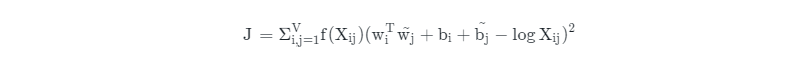

위 수식에서 우측의 괄호를 보면 중심 단어와 주변 단어 벡터의 내적이 동시 등장 빈도의 로그값과의 차이를 줄이도록 설계되었음을 볼 수 있습니다. 

중심 단어 i가 등장했을 때, 윈도우 내 주변 단어 j가 등장하는 횟수인 Xij를 입력으로 하는 함수 f(Xij)항의 의도는 가중치를 주기 위한 것이다.

GloVe의 연구진은 동시 등장 행렬에서 동시 등장 빈도의 값 f(Xik)이 굉장히 낮은 경우에는 거의 도움이 되지 않는 정보라고 판단했습니다. 그래서 이에 대한 가중치를 주기 위해서 GloVe 연구진이 선택한 것은 바로 f(Xik)의 값에 영향을 받는 가중치 함수(Weighting function) 를 도입하는 것입니다.








5. pre-trained GloVe 모델 실습

위에서도 언급했듯이 GloVe는 2014년에 개발되었고, 2015년에 1.2 버전이 나온 이후로는 관리되지 않고 있기 때문에 최신 버전의 python에서는 GloVe를 설치하는 것이 불가능합니다. 따라서 pre-trained된 GloVe 모델을 불러와서 간단한 실습을 해보겠습니다.

GloVe에는 4개의 데이터셋을 사용해 pre-trained된 word vector들이 있습니다.

- Common Crawl (42B tokens, 1.9M vocab, uncased, 300d vectors, 1.75 GB download)
- Common Crawl (840B tokens, 2.2M vocab, cased, 300d vectors, 2.03 GB download)
- Wikipedia 2014 + Gigaword 5 (6B tokens, 400K vocab, uncased, 300d vectors, 822 MB download)
- Twitter (2B tweets, 27B tokens, 1.2M vocab, uncased, 200d vectors, 1.42 GB download)

gensim을 이용해 pre-train된 Glove 모델을 간단히 불러올 수 있습니다. 여기서는 'Wikipedia 2014 + Gigaword 5' 데이터셋으로 학습된 모델을 불러오겠습니다.


In [ ]:
import gensim.downloader as api
glove_model = api.load('glove-wiki-gigaword-50') # glove vectors 다운로드
glove_model.most_similar('dog') # 'dog'과 비슷한 단어 찾기

[==================================================] 100.0% 66.0/66.0MB downloaded


[('cat', 0.9218004941940308),
 ('dogs', 0.8513158559799194),
 ('horse', 0.7907583713531494),
 ('puppy', 0.7754920721054077),
 ('pet', 0.7724708318710327),
 ('rabbit', 0.7720814347267151),
 ('pig', 0.7490062117576599),
 ('snake', 0.7399188876152039),
 ('baby', 0.7395570278167725),
 ('bite', 0.7387937307357788)]

In [ ]:
glove_model.most_similar('memoryy')

KeyError: ignored

GloVe는 Word2Vec과 같이 OOV 문제를 가지고 있어서 'memoryy'라는 단어는 인식하지 못합니다. 또한 pre-trained GloVe 모델은 한글이나 알파벳 대문자가 포함된 데이터셋으로 학습하지 않았기 때문에 알파벳 소문자만 인식한다는 사실에 유의해야한다.